In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class SVM_binary:
    def __init__(self, epochs = 50, learning_rate = 0.001, reg_param = 0.01):
        self.w = None
        self.b = 0
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.reg_param = reg_param
    def convert(self, y):
        for i in range(len(y)):
            if y[i] == 0:
                y[i] = -1
        return y
    def GD(self, X, y, incremental_learning = False):
        m, n = len(X), len(X[0])
        y = self.convert(y)
        if not incremental_learning:
            self.w = np.zeros(n)
        
        for epoch in range(self.epochs):
            for i, xi in enumerate(X):
                if y[i] * (np.dot(xi, self.w) - self.b) >= 1:
                    outside = True
                else:
                    outside = False
                    
                if outside:
                    self.w = self.w - self.learning_rate * (2 * self.reg_param * self.w)
                else:
                    self.w = self.w - self.learning_rate * (2 * self.reg_param * self.w - np.dot(xi, y[i]))
                    self.b = self.b - self.learning_rate * y[i]
        return self.w, self.b
    
    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b)
    
    def accuracy(self, y_pred, y_true):
        return np.sum(y_true == y_pred) / len(y_true)

In [23]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [24]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std = 1.1)
X_1, X_2, y_1, y_2 = train_test_split(X, y, test_size = 0.5)

In [25]:
clf1 = SVM_binary()
clf1.GD(X_1, y_1)

(array([ 0.12449829, -0.33344549]), -0.013000000000000005)

In [26]:
colors = ['blue' if yi == 1 else 'red' for yi in y]

In [27]:
def plot_hyperplane(w, b):
    x = [0.01 * xi for xi in range(-1000, 1000)]
    y = [[b - w[0] * xi] / w[1] for xi in x]
    y_p = [[b - w[0] * xi + 1] / w[1] for xi in x]
    y_n = [[b - w[0] * xi - 1] / w[1] for xi in x]
    plt.plot(x, y)
    plt.plot(x, y_p)
    plt.plot(x, y_n)

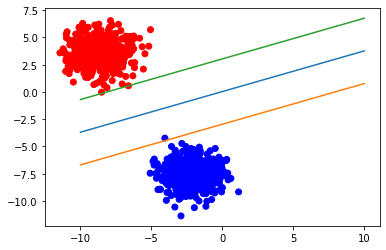

In [28]:
plt.scatter(X[:, 0], X[:, 1], c = colors)
plot_hyperplane(clf1.w, clf1.b)

In [29]:
clf1.GD(X_2, y_2, incremental_learning = True)

(array([ 0.1279193 , -0.28674262]), -0.017000000000000008)

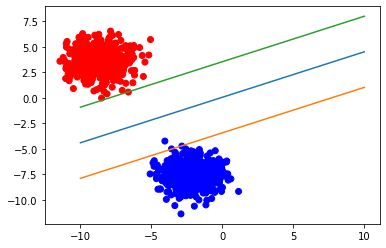

In [30]:
plt.scatter(X[:, 0], X[:, 1], c = colors)
plot_hyperplane(clf1.w, clf1.b)

In [31]:
def count(x, e):
    c = 0
    for xi in x:
        if xi == e:
            c += 1
    return c

def maximum_freq(x):
    mx_f = 0
    ele = -1
    for xi in x:
        c = count(x, xi)
        if c > mx_f:
            mx_f = c
            ele = xi
    return ele

In [32]:
class SVM:
    def __init__(self, epochs = 100, learning_rate = 0.001, reg_param = 0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.reg_param = reg_param
        self.classifiers = []
    
    def get_data(self, X, y, y1, y2):
        X_ = []
        y_ = []
        for i in range(len(y)):
            if y[i] == y1 or y[i] == y2:
                X_.append(X[i])
                y_.append(y[i])
        return X_, y_
        
    def split_dataset(self, X, y): # classes name should be like 0, 1, ..., c - 1
        Xs = []
        ys = []
        c = np.unique(y).shape[0]
        for i in range(0, c):
            for j in range(i + 1, c):
                Xsi, ysi = self.get_data(X, y, i, j)
                Xs.append(Xsi)
                ys.append(ysi)
        return Xs, ys
        
        
    def fit(self, X, y, incremental_learning = False):
        Xs, ys = self.split_dataset(X, y)
        i = 0
        for Xsi, ysi in zip(Xs, ys):
            if not incremental_learning:
                clf = SVM_binary(self.epochs, self.learning_rate, self.reg_param)
                clf.GD(Xsi, ysi)
                self.classifiers.append(clf)
            else:
                self.classifiers[i].GD(Xsi, ysi, True)
            i += 1
    
    def predict(self, X):
        predictions = []
        for clf in self.classifiers:
            predictions.append(clf.predict(X))
        predictions = np.array(predictions)
        results = []
        for i in range(len(predictions[0])):
            results.append(maximum_freq(predictions[:, i]))
        return results
        
    
    def accuracy(self, y_pred, y_true):
        return np.sum(y_true == y_pred) / len(y_true)

In [33]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()

def my_split_iris(dataset):
  X, y = dataset.data, dataset.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.5)
  return (X_train1, y_train1), (X_train2, y_train2), (X_test, y_test)

(X_train1, y_train1), (X_train2, y_train2), (X_test, y_test) = my_split_iris(iris)

In [34]:
clf = SVM()
clf.fit(X_train1, y_train1)
clf.fit(X_train2, y_train2, incremental_learning = True)

clf.accuracy(clf.predict(X_test), y_test)

0.26666666666666666

In [35]:
def only_0_1(X, y):
    X_ = []
    y_ = []
    for Xi, yi in zip(X, y):
        if yi == 0 or yi == 1:
            X_.append(Xi)
            y_.append(yi)
    return X_, y_

In [36]:
def my_split_iris(dataset):
  X, y = dataset.data, dataset.target
  X, y = only_0_1(X, y)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
  X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.5)
  return (X_train1, y_train1), (X_train2, y_train2), (X_test, y_test)

(X_train1, y_train1), (X_train2, y_train2), (X_test, y_test) = my_split_iris(iris)

In [37]:
clf = SVM_binary()
clf.GD(X_train1, y_train1)

(array([-0.1125267 , -0.51084054,  0.74941554,  0.35961639]),
 0.08100000000000006)

In [38]:
print("accuracy on training data = ", clf.accuracy(clf.predict(X_train1), y_train1))
print("accuracy on testing data = ", clf.accuracy(clf.predict(X_test), y_test))

accuracy on training data =  1.0
accuracy on testing data =  0.6


In [39]:
clf.GD(X_train2, y_train2, incremental_learning = True)

(array([-0.14260898, -0.52685656,  0.79439997,  0.37218575]),
 0.09300000000000007)

In [40]:
print("accuracy on training data = ", clf.accuracy(clf.predict(X_train2), y_train2))
print("accuracy on testing data = ", clf.accuracy(clf.predict(X_test), y_test))

accuracy on training data =  1.0
accuracy on testing data =  0.6
